In [1]:
from IPython.display import display
import phik
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import os
import seaborn as sns
import gc

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

**application_{train|test}.csv**

In [2]:
application_train = pd.read_csv(r"C:\Users\ADMIN\Downloads\Project1-HOMECREDIT\home-credit-default-risk\application_train.csv")
print('application_train data shape: ', application_train.shape)
application_train.head()

application_train data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [3]:
print('-'*80)
print(f'The shape of application_train.csv is: {application_train.shape}')
print('-'*80)
print(f'Number of duplicate values in application_train: {application_train.shape[0] - application_train.duplicated().shape[0]}')
print('-'*80)

--------------------------------------------------------------------------------
The shape of application_train.csv is: (307511, 122)
--------------------------------------------------------------------------------
Number of duplicate values in application_train: 0
--------------------------------------------------------------------------------


In [4]:
application_test = pd.read_csv(r"C:\Users\ADMIN\Downloads\Project1-HOMECREDIT\home-credit-default-risk\application_test.csv")
print('application_test data shape: ', application_test.shape)
application_test.head()

application_test data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,...,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.525734,0.509677,0.612704,0.3052,0.1974,0.9970,0.9592,0.1165,0.32,0.2759,...,0.3081,0.1974,0.9970,0.9597,0.1173,0.32,0.2759,0.375,0.0417,0.2078,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0

In [5]:
print('-'*80)
print(f'The shape of application_test.csv is: {application_test.shape}')
print('-'*80)
print(f'Number of duplicate values in application_test: {application_test.shape[0] - application_test.duplicated().shape[0]}')
print('-'*80)

--------------------------------------------------------------------------------
The shape of application_test.csv is: (48744, 121)
--------------------------------------------------------------------------------
Number of duplicate values in application_test: 0
--------------------------------------------------------------------------------


# 1. Data overview

In [6]:
pos_cash = pd.read_csv(r"C:\Users\ADMIN\Downloads\Project1-HOMECREDIT\home-credit-default-risk\POS_CASH_balance.csv")
print('POS cash balance data shape: ', pos_cash.shape)
pos_cash.head()

POS cash balance data shape:  (10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [7]:
pos_cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [8]:
pos_cash.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,10001358.0,1.903217e+06,535846.530722,1000001.0,1434405.0,1896565.0,2368963.0,2843499.0
SK_ID_CURR,10001358.0,2.784039e+05,102763.745090,100001.0,189550.0,278654.0,367429.0,456255.0
MONTHS_BALANCE,10001358.0,-3.501259e+01,26.066570,-96.0,-54.0,-28.0,-13.0,-1.0
CNT_INSTALMENT,9975287.0,1.708965e+01,11.995056,1.0,10.0,12.0,24.0,92.0
CNT_INSTALMENT_FUTURE,9975271.0,1.048384e+01,11.109058,0.0,3.0,7.0,14.0,85.0
SK_DPD,10001358.0,1.160693e+01,132.714043,0.0,0.0,0.0,0.0,4231.0
SK_DPD_DEF,10001358.0,6.544684e-01,32.762491,0.0,0.0,0.0,0.0,3595.0


In [9]:
print(f'The shape of POS_CASH_balance.csv is: {pos_cash.shape}')
print('-'*80)
print(f'Number of unique SK_ID_PREV in dseb63_POS_CASH_balance.csv are: {len(pos_cash.SK_ID_PREV.unique())}')
print(f'Number of unique SK_ID_CURR in dseb63_POS_CASH_balance.csv are: {len(pos_cash.SK_ID_CURR.unique())}')
print('-'*80)
print(f'Number of overlapping SK_ID_CURR in dseb63_application_train.csv and POS_CASH_balance.csv are: {len(set(application_train.SK_ID_CURR.unique()).intersection(set(pos_cash.SK_ID_CURR.unique())))}')
print(f'Number of overlapping SK_ID_CURR in dseb63_application_test.csv and POS_CASH_balance.csv are: {len(set(application_test.SK_ID_CURR.unique()).intersection(set(pos_cash.SK_ID_CURR.unique())))}')
print('-'*80)
print(f'Number of duplicate values in POS_CASH_balance: {pos_cash.shape[0] - pos_cash.duplicated().shape[0]}')

The shape of POS_CASH_balance.csv is: (10001358, 8)
--------------------------------------------------------------------------------
Number of unique SK_ID_PREV in dseb63_POS_CASH_balance.csv are: 936325
Number of unique SK_ID_CURR in dseb63_POS_CASH_balance.csv are: 337252
--------------------------------------------------------------------------------
Number of overlapping SK_ID_CURR in dseb63_application_train.csv and POS_CASH_balance.csv are: 289444
Number of overlapping SK_ID_CURR in dseb63_application_test.csv and POS_CASH_balance.csv are: 47808
--------------------------------------------------------------------------------
Number of duplicate values in POS_CASH_balance: 0


# 2. Checking imbalance

The imbalance ratio (IR) is typically defined as:\
Imbalance Ratio = Number of samples in the majority class/ Number of samples in the minority class
* An imbalance ratio close to 1 indicates a balanced dataset (e.g., equal or nearly equal numbers of samples in each class).
* A low imbalance ratio (e.g., close to 0) indicates significant imbalance, meaning one class dominates the dataset.

In [10]:
"""
This file contains functions to calculate imbalance ratio of a dataset.

Functions:
    1. imbalance_col: function
        Function to create a dataframe of imbalance columns.
"""

def imbalance_col(data):
    """
    Function to create a dataframe of imbalance columns.

    Inputs:
        data: DataFrame
            The dataset for which to calculate imbalance ratios.

    Returns:
        DataFrame of imbalance columns and their respective imbalance ratios.
    """
    # Filter out columns containing '_ID_'
    relevant_columns = [col for col in data.columns if '_ID_' not in col]
    data = data[relevant_columns]

    imbalance_ratios = {}

    for col in data.columns:
        value_counts = data[col].value_counts()

        if data[col].dtype == 'object':
            # Categorical column imbalance ratio
            if len(value_counts) > 1:
                imbalance_ratios[col] = value_counts.min() / value_counts.max()
            else:
                imbalance_ratios[col] = None
        else:
            # Numerical column imbalance ratio for binary values (0 and 1)
            if set([0, 1]).issubset(value_counts.index):
                imbalance_ratios[col] = value_counts[1] / value_counts[0]
            else:
                imbalance_ratios[col] = None

    # Print imbalance ratios for all columns
    for col, ratio in imbalance_ratios.items():
        print(
            f"Imbalance Ratio for column '{col}': {f'{ratio:.4f}' if ratio is not None else 'None'}"
        )


    # Filter out columns with no valid imbalance ratio
    valid_ratios = {col: ratio for col, ratio in imbalance_ratios.items() if ratio is not None}

    if not valid_ratios:
        print("All columns do not have data to calculate the imbalance ratio.")
        return None

    # Find the column with the highest imbalance ratio
    max_imbalance_col = max(valid_ratios, key=valid_ratios.get)
    print(
        f"The column with the heaviest imbalance ratio is '{max_imbalance_col}' "
        f"with a ratio of {valid_ratios[max_imbalance_col]:.4f}"
    )

    # Return as a DataFrame for further use
    return pd.DataFrame.from_dict(valid_ratios, orient='index', columns=['Imbalance Ratio'])


In [11]:
imbalance_col(pos_cash)

Imbalance Ratio for column 'MONTHS_BALANCE': None
Imbalance Ratio for column 'CNT_INSTALMENT': None
Imbalance Ratio for column 'CNT_INSTALMENT_FUTURE': 0.4320
Imbalance Ratio for column 'NAME_CONTRACT_STATUS': 0.0000
Imbalance Ratio for column 'SK_DPD': 0.0023
Imbalance Ratio for column 'SK_DPD_DEF': 0.0022
The column with the heaviest imbalance ratio is 'CNT_INSTALMENT_FUTURE' with a ratio of 0.4320


,Imbalance Ratio
CNT_INSTALMENT_FUTURE,4.319530e-01
NAME_CONTRACT_STATUS,2.185525e-07
SK_DPD,2.253421e-03
SK_DPD_DEF,2.238609e-03


## Observations 1

- `MONTHS_BALANCE:` No significant imbalance detected in this feature.
- `CNT_INSTALMENT:` No noticeable imbalance found.
- `CNT_INSTALMENT_FUTURE:` Displays a moderate imbalance with a ratio of **0.432**, suggesting some unevenness in class distribution.
- `NAME_CONTRACT_STATUS:` No class imbalance detected.
- `SK_DPD:` Shows a minor imbalance with a ratio of **0.0023**, indicating minimal disparity.
- `SK_DPD_DEF:` Similarly, a slight imbalance is observed with a ratio of **0.0022**.

**Conclusion:** While most features exhibit minimal or no imbalance, features with moderate imbalance (e.g., `CNT_INSTALMENT_FUTURE`) require attention to ensure balanced representation, especially in predictive modeling tasks.


# 3. Checking outliers

In [12]:
def plot_boxplots(data, numerical_columns):
    """
    Creates box plots for each numerical column to visualize outliers.

    Parameters:
        data (DataFrame): The input dataset.
        numerical_columns (list): List of numerical column names.
    """
    for column in numerical_columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data[column])
        plt.title(f'Boxplot for {column}')
        plt.show()

def get_outliers(data, outlier_threshold=1.5):
    """
    Identifies rows containing outliers for numerical columns based on the IQR method.

    Parameters:
        data (DataFrame): The input dataset.
        outlier_threshold (float): The multiplier for the IQR to define outliers.

    Returns:
        DataFrame: Rows containing outliers for numerical columns.
    """
    numerical_columns = data.select_dtypes(include='number').columns
    numerical_columns = [col for col in numerical_columns if "_ID_" not in col]

    # Calculate Q1, Q3, and IQR for numerical columns
    q1 = data[numerical_columns].quantile(0.25)
    q3 = data[numerical_columns].quantile(0.75)
    iqr = q3 - q1

    # Identify outliers using the IQR method
    outliers = ((data[numerical_columns] < (q1 - outlier_threshold * iqr)) |
                (data[numerical_columns] > (q3 + outlier_threshold * iqr)))

    return data[outliers.any(axis=1)]

def outlier(data, outlier_threshold=1.5):
    """
    Main function to visualize and identify outliers in the dataset.

    Parameters:
        data (DataFrame): The input dataset.
        outlier_threshold (float): The multiplier for the IQR to define outliers.

    Outputs:
        Prints a DataFrame containing rows with outliers.
    """
    numerical_columns = data.select_dtypes(include='number').columns
    numerical_columns = [col for col in numerical_columns if "_ID_" not in col]

    # Plot boxplots for numerical columns
    plot_boxplots(data, numerical_columns)

    # Get rows with outliers
    rows_with_outliers = get_outliers(data, outlier_threshold)
    print("Rows with outliers:")
    print(rows_with_outliers)

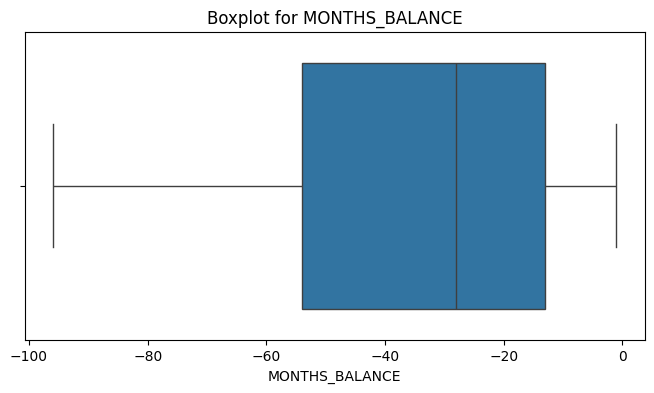

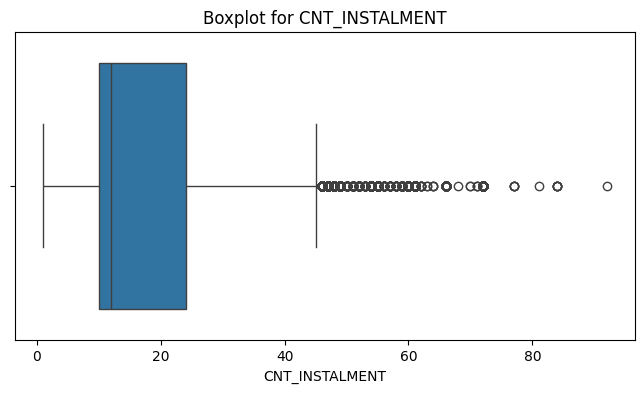

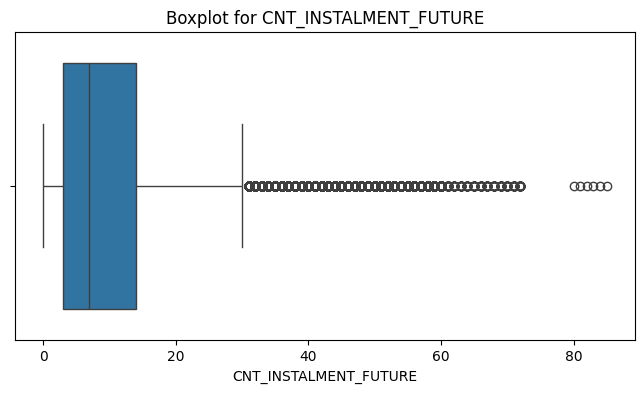

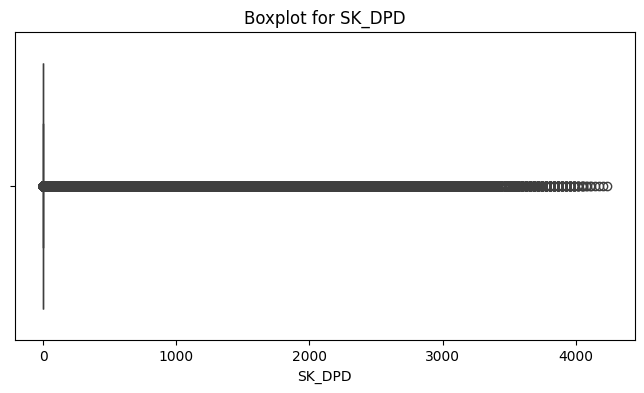

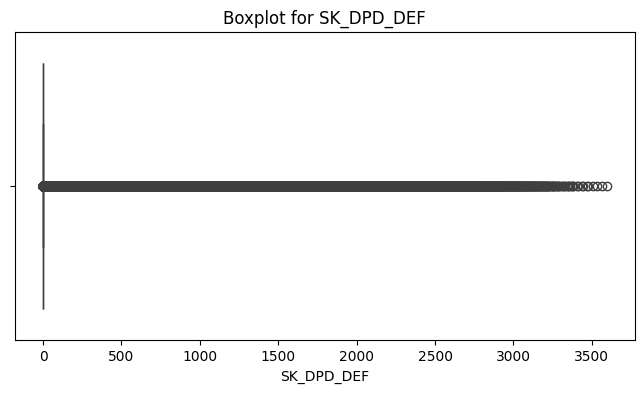

Rows with outliers:
          SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0            1803195      182943             -31            48.0   
1            1715348      367990             -33            36.0   
3            1903291      269225             -35            48.0   
4            2341044      334279             -35            36.0   
6            1110516      204376             -38            48.0   
...              ...         ...             ...             ...   
10001352     2700641      448867             -19             6.0   
10001353     2448283      226558             -20             6.0   
10001354     1717234      141565             -19            12.0   
10001355     1283126      315695             -21            10.0   
10001356     1082516      450255             -22            12.0   

          CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                          45.0               Active       0           0  
1            

In [13]:
outlier(pos_cash)

## Observations 2

- **MONTHS_BALANCE:** No clear evidence of outliers. A deeper analysis of the data distribution is recommended to detect any potential anomalies.
- **CNT_INSTALMENT:** Outlier information is not specified. Further investigation is necessary to identify and address possible outliers.
- **CNT_INSTALMENT_FUTURE:** No immediate outlier information. Additional examination is needed to confirm and handle any unusual values.
- **NAME_CONTRACT_STATUS:** Outlier detection is not applicable, as this column likely contains categorical data.
- **SK_DPD:** Potential outliers may exist, with high values such as **614**, **609**, and **843**. Detailed analysis is needed to confirm and manage these.
- **SK_DPD_DEF:** Similar to `SK_DPD`, high-value outliers might be present. Further analysis is required for confirmation.

**Recommendation:** For numeric columns such as `SK_DPD` and `SK_DPD_DEF`, a focused analysis using statistical methods (e.g., z-scores or IQR) is essential to address potential outliers. For categorical columns like `NAME_CONTRACT_STATUS`, consider examining for invalid or inconsistent entries instead of numeric outliers.


# 4.Checking missing values

In [14]:
def nan_percent(data):
    '''
    Function to create a dataframe of percentage of NaN values for each column of the dataframe

    Inputs:
        data (DataFrame): Input DataFrame

    Returns:
        DataFrame: A DataFrame containing the columns and their percentage of NaN values
    '''
    # Calculate the percentage of NaN values for each column
    nan_percentages = data.isnull().mean() * 100
    df_nan = nan_percentages.reset_index().rename(columns={0: 'Percentage_of_NaN', 'index': 'Column'})

    # Sorting the dataframe by decreasing order of percentage of NaN values
    df_nan = df_nan.sort_values(by='Percentage_of_NaN', ascending=False)

    return df_nan


def plot_nan_percent(df_nan, title_name, tight_layout=True, figsize=(20, 10), grid=False, rotation=90):
    '''
    Function to plot Bar Plots of NaN percentages for each Column with missing values

    Inputs:
        df_nan (DataFrame): DataFrame containing columns and their NaN percentages
        title_name (str): Title for the plot
        tight_layout (bool, default=True): Whether to use tight layout for the plot
        figsize (tuple, default=(20, 10)): Size of the plot
        grid (bool, default=False): Whether to display gridlines on the plot
        rotation (int, default=90): Degree of rotation for x-tick labels
    '''

    # Filter for columns with non-zero NaN percentages
    df_nan_nonzero = df_nan[df_nan['Percentage_of_NaN'] > 0]

    if not df_nan_nonzero.empty:
        print(f"Number of columns with NaN values: {df_nan_nonzero.shape[0]}")

        # Plotting the Bar Plot for NaN percentages
        plt.figure(figsize=figsize)
        sns.barplot(x='Column', y='Percentage_of_NaN', data=df_nan_nonzero, palette='Blues_r')
        plt.xticks(rotation=rotation)
        plt.xlabel(title_name, fontsize=13)
        plt.ylabel('Percentage of NaN', fontsize=13)
        plt.title(f'Percentage of NaN values in {title_name}', fontsize=22, weight='bold', pad=30)
        
        if grid:
            plt.grid(True)

        if tight_layout:
            plt.tight_layout()

        plt.show()
    else:
        print(f"The dataframe {title_name} does not contain any NaN values.")


In [15]:
nan_pos = nan_percent(pos_cash)
nan_pos

,Column,Percentage_of_NaN
4,CNT_INSTALMENT_FUTURE,0.260835
3,CNT_INSTALMENT,0.260675
1,SK_ID_CURR,0.000000
0,SK_ID_PREV,0.000000
2,MONTHS_BALANCE,0.000000
5,NAME_CONTRACT_STATUS,0.000000
6,SK_DPD,0.000000
7,SK_DPD_DEF,0.000000


Number of columns with NaN values: 2


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23028\3747520759.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Column', y='Percentage_of_NaN', data=df_nan_nonzero, palette='Blues_r')


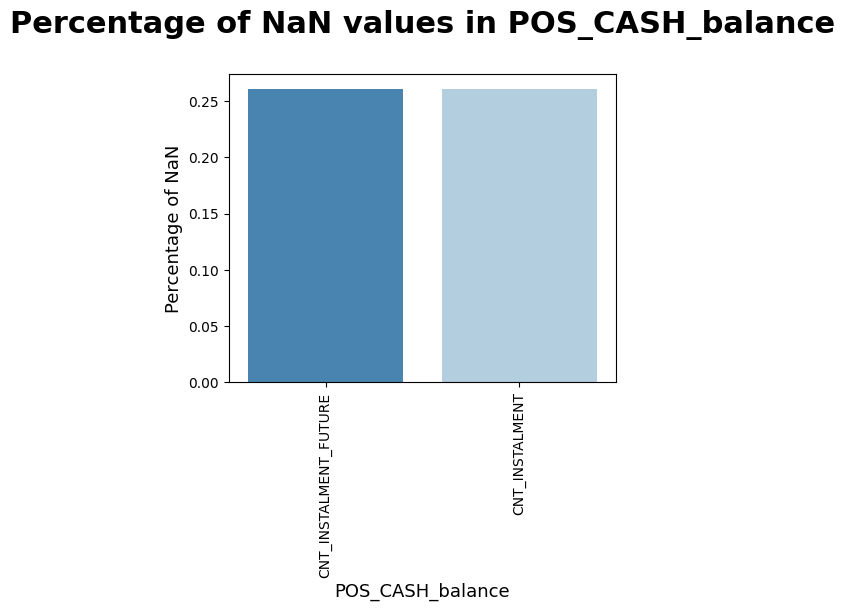

In [16]:
plot_nan_percent(nan_pos, 'POS_CASH_balance', tight_layout = False, figsize = (5,4))

## Observations 3

1. **Presence of NaN Values:**  
   Among the 8 columns in the `POS_CASH_balance` dataset, only two columns contain missing values (`NaN`):
   - **Counts of Installments Remaining**
   - **Term of the Loan**

2. **Minimal Impact of Missing Data:**  
   The proportion of missing values in these columns is extremely low, accounting for only **0.26%**. This minimal level of missingness is unlikely to significantly affect the dataset's overall quality or analysis.

**Recommendation:** Given the low proportion of `NaN` values, these can be handled effectively by imputation methods (e.g., mean or median substitution) or by removing the affected rows, depending on the analysis context.


# 5. Checking categorical columns

In [17]:

def get_category_columns(data):
    """
    Returns a DataFrame with details about categorical columns, including unique value counts and NaN percentages.

    Parameters:
        data (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A DataFrame containing feature names, unique counts, and NaN percentages.
    """
    category_columns = data.select_dtypes(include='object').columns
    column_info = pd.DataFrame({
        'Feature': category_columns,
        'Nunique': [data[col].nunique() for col in category_columns],
        'Percentage_of_NaN': [data[col].isnull().mean() * 100 for col in category_columns]
    }).sort_values(by='Percentage_of_NaN', ascending=False)
    return column_info

def plot_category_summary(data, name, figsize=(12, 8)):
    """
    Plots the number of unique values for categorical columns.

    Parameters:
        data (pd.DataFrame): The categorical column summary DataFrame.
        name (str): The dataset name.
        figsize (tuple): Figure size for the plot.
    """
    data = data.sort_values(by='Nunique', ascending=False)
    plt.figure(figsize=figsize)
    sns.barplot(x='Nunique', y='Feature', data=data, palette='Blues_r')
    plt.title(f'Unique Value Counts in Categorical Columns - {name}', fontsize=18, weight='bold')
    plt.xlabel('Number of Unique Values')
    plt.ylabel('Categorical Columns')
    plt.tight_layout()
    plt.show()

def plot_categorical_distribution(data, column_name, figsize=(18, 6), show_percentage=True, rotation=0):
    """
    Plots the distribution of a categorical variable and optionally shows percentages.

    Parameters:
        data (pd.DataFrame): The input DataFrame.
        column_name (str): Name of the categorical column to plot.
        figsize (tuple): Size of the plot figure.
        show_percentage (bool): Whether to display percentages on the bars.
        rotation (int): Degree of rotation for x-tick labels.
    """
    value_counts = data[column_name].value_counts()
    plt.figure(figsize=figsize)
    sns.barplot(x=value_counts.index, y=value_counts, palette='Blues_r')
    plt.title(f'Distribution of {column_name}', fontsize=18, weight='bold')
    plt.xlabel(column_name)
    plt.ylabel('Counts')
    plt.xticks(rotation=rotation)

    if show_percentage:
        total = value_counts.sum()
        for i, count in enumerate(value_counts):
            plt.text(i, count + 0.02 * total, f'{(count / total) * 100:.1f}%', ha='center', fontsize='small')

    plt.tight_layout()
    plt.show()

def plot_defaulter_comparison(data, x):
    """
    Plots pie charts for distribution of a categorical variable by default status.

    Parameters:
        data (pd.DataFrame): The input DataFrame with a "TARGET" column.
        column_name (str): Name of the categorical column to plot.
    """
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    x1 = data[data["TARGET"] == 0][x].value_counts(
        normalize=True).sort_values(ascending=False)
    ax[0].pie(x1, labels=x1.index, autopct='%1.1f%%')
    ax[0].title.set_text("Non-defaulter")

    x2 = data[data["TARGET"] == 1][x].value_counts(
        normalize=True).sort_values(ascending=False)
    ax[1].pie(x2, labels=x2.index, autopct='%1.1f%%')
    ax[1].title.set_text("Defaulter")

    ax[1].legend(loc='upper right', bbox_to_anchor=(1.5, 1), title=x)

    for i in range(2):
        for text in ax[i].texts[::2]:
            text.set_visible(False)

    fig.suptitle(f"Distribution of {x}\nwith TARGET", fontsize=20)

    fig.tight_layout()
    plt.tight_layout()
    plt.show()


def print_unique_categories(data, column_name, show_counts=False):
    """
    Prints unique categories of a column and optionally their counts.

    Parameters:
        data (pd.DataFrame): The input DataFrame.
        column_name (str): Name of the column to analyze.
        show_counts (bool): Whether to display counts for each category.
    """
    unique_values = data[column_name].unique()
    print(f"Unique categories in '{column_name}': {unique_values}")

    if show_counts:
        counts = data[column_name].value_counts()
        print(f"\nCounts for each category in '{column_name}':\n{counts}")


In [18]:
cate_pc = get_category_columns(pos_cash)
cate_pc

,Feature,Nunique,Percentage_of_NaN
0,NAME_CONTRACT_STATUS,9,0.0


In [32]:
print_unique_categories(pos_cash, 'NAME_CONTRACT_STATUS')

Unique categories in 'NAME_CONTRACT_STATUS': ['Active' 'Completed' 'Signed' 'Approved' 'Returned to the store' 'Demand'
 'Canceled' 'XNA' 'Amortized debt']


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23028\522099033.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nunique', y='Feature', data=data, palette='Blues_r')


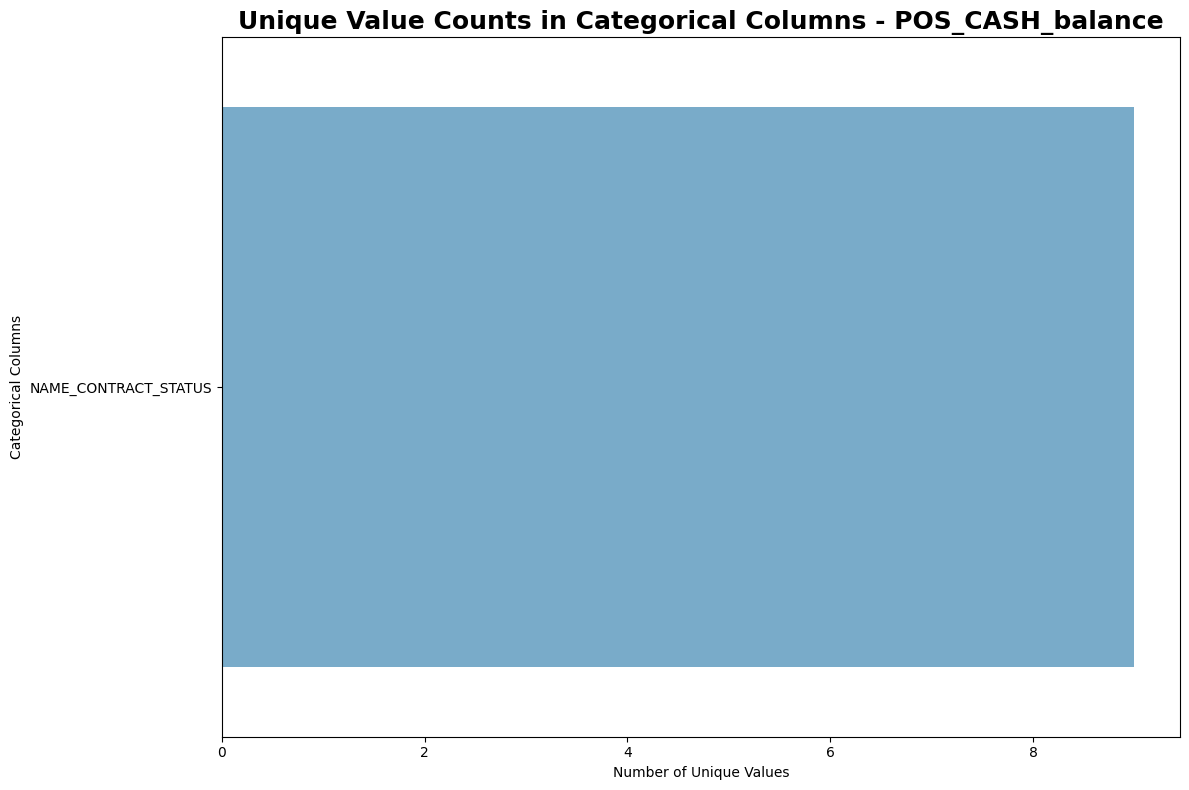

In [19]:
plot_category_summary(cate_pc, 'POS_CASH_balance')

## Observations 4

**Feature:** `NAME_CONTRACT_STATUS`

- **Number of Unique Values (Nunique):** 9  
- **Percentage of Missing Values (NaN):** 0.0%  

**Insights:**  
1. The absence of missing values in this column (0.0% NaN) simplifies preprocessing, as no imputation or removal of rows is required.  
2. With nine unique values, this feature is likely categorical, representing various contract status categories.  

**Recommendation:**  
Ensure appropriate encoding of this categorical feature (e.g., one-hot encoding or label encoding) for machine learning models if required.
 context.


# 6.EDA

## 6.1. Correlation

In [33]:

class CorrelationMatrix:
    def __init__(self, data, columns_to_drop=None, figsize=(25, 23), mask_upper=True, linewidth=0.5, fontsize=10, cmap='Blues'):
        self.data = data
        self.columns_to_drop = columns_to_drop if columns_to_drop else []
        self.figsize = figsize
        self.mask_upper = mask_upper
        self.linewidth = linewidth
        self.fontsize = fontsize
        self.cmap = cmap
        self.corr_data = None

    def plot_correlation_matrix(self, round_decimals=2):
        """Plots the correlation matrix heatmap."""
        data = self.data.drop(self.columns_to_drop + ['TARGET'], axis=1, errors='ignore')
        self.corr_data = data.corr(numeric_only=True)

        # Create mask for upper triangle
        mask = None
        if self.mask_upper:
            mask = np.triu(np.ones_like(self.corr_data, dtype=bool))

        # Plot heatmap
        plt.figure(figsize=self.figsize)
        sns.heatmap(
            self.corr_data.round(round_decimals),
            annot=True,
            mask=mask,
            cmap=self.cmap,
            linewidths=self.linewidth,
            fmt=f".{round_decimals}f"
        )
        plt.xticks(rotation=90, fontsize=self.fontsize)
        plt.yticks(fontsize=self.fontsize)
        plt.title("Correlation Heatmap for Numerical Features", size=20, weight='bold', pad=20)
        plt.tight_layout()
        plt.show()

    def target_top_corr(self, target_top_columns=10):
        """Returns the top correlated features with the target."""
        if 'TARGET' not in self.data:
            raise ValueError("Target column not found in data.")

        # Calculate correlations with target
        target_corr = self.data.corr(numeric_only=True)['TARGET']
        top_corr = target_corr.abs().sort_values(ascending=False).iloc[1:target_top_columns+1]
        top_corr_df = pd.DataFrame({'Feature': top_corr.index, 'Correlation': top_corr.values})

        return top_corr_df


def numeric_cor(data, round_decimals=2):
    """Plots the correlation of numerical features."""
    numeric_df = data.select_dtypes(include='number')
    numeric_df_corr = numeric_df.corr()

    plt.figure(figsize=(10, 10))
    mask = np.triu(np.ones_like(numeric_df_corr, dtype=bool))
    sns.heatmap(
        numeric_df_corr.round(round_decimals),
        annot=True,
        mask=mask,
        cmap='Blues',
        linewidth=0.5,
        fmt=f".{round_decimals}f"
    )
    plt.title("Correlation of Numerical Features", fontsize=20, weight='bold', pad=20)
    plt.tight_layout()
    plt.show()


def plot_phik_matrix(data, categorical_columns, figsize=(20, 20), mask_upper=True, linewidth=0.5, fontsize=10, cmap='Blues', show_target_top_corr=True, target_top_columns=10, round_decimals=2):
    """Plots the Phi-K correlation matrix for categorical features."""
    # Calculate Phi-K correlation
    data_for_phik = data[categorical_columns].astype(str)
    phik_corr = data_for_phik.phik_matrix()

    # Create mask
    mask = None
    if mask_upper:
        mask = np.triu(np.ones_like(phik_corr, dtype=bool))

    # Plot heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(
        phik_corr.round(round_decimals),
        annot=True,
        mask=mask,
        cmap=cmap,
        linewidths=linewidth,
        fmt=f".{round_decimals}f"
    )
    plt.title("Phi-K Correlation Heatmap for Categorical Features", fontsize=20, weight='bold', pad=20)
    plt.xticks(rotation=90, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.tight_layout()
    plt.show()

    # Display top correlations with target
    if show_target_top_corr and 'TARGET' in data.columns:
        phik_target = phik_corr['TARGET'].sort_values(ascending=False).iloc[1:target_top_columns+1]
        top_corr_df = pd.DataFrame({'Feature': phik_target.index, 'Phi-K Correlation': phik_target.values})
        print("Top correlated features with TARGET:")
        display(top_corr_df)


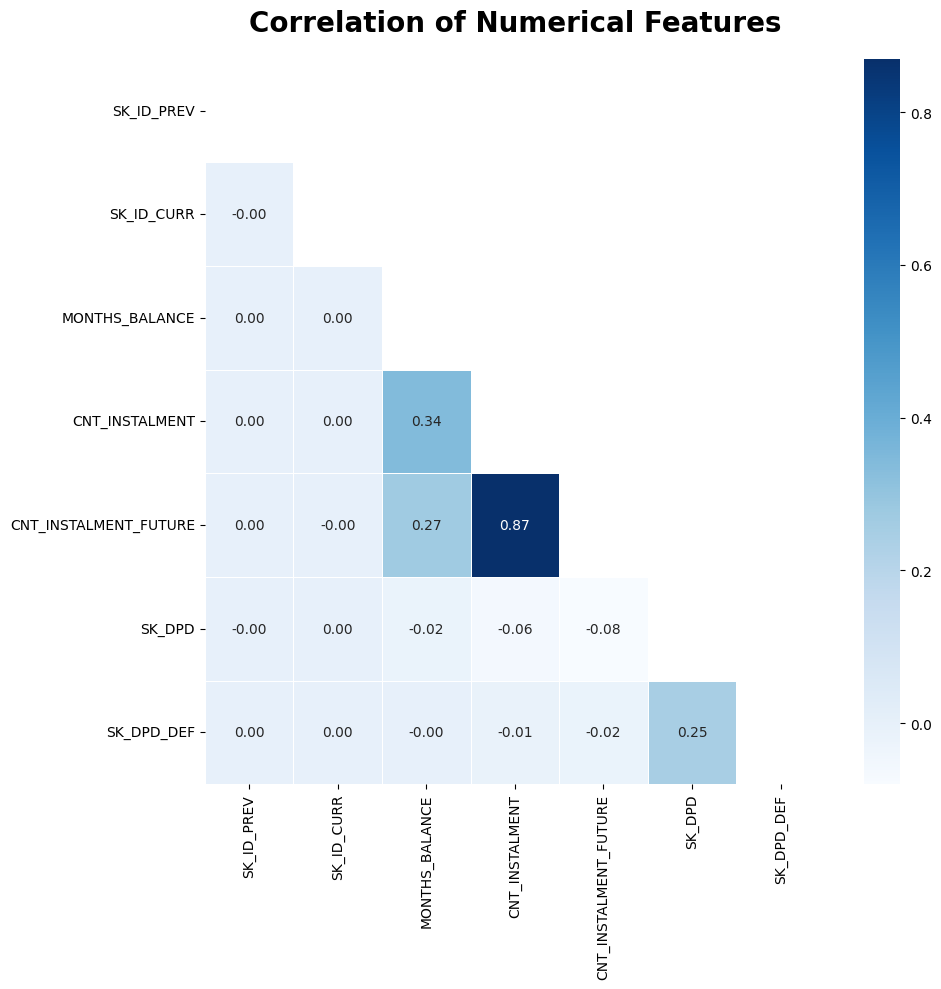

In [34]:
numeric_cor(pos_cash)

**merge with application_train**

In [35]:
pos_cash_merged = pd.merge(application_train[['SK_ID_CURR','TARGET']], pos_cash, how = 'left', on=['SK_ID_CURR'])
pos_cash_merged.head()

,SK_ID_CURR,TARGET,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,100002,1,1038818.0,-13.0,24.0,18.0,Active,0.0,0.0
1,100002,1,1038818.0,-16.0,24.0,21.0,Active,0.0,0.0
2,100002,1,1038818.0,-18.0,24.0,23.0,Active,0.0,0.0
3,100002,1,1038818.0,-17.0,24.0,22.0,Active,0.0,0.0
4,100002,1,1038818.0,-5.0,24.0,10.0,Active,0.0,0.0


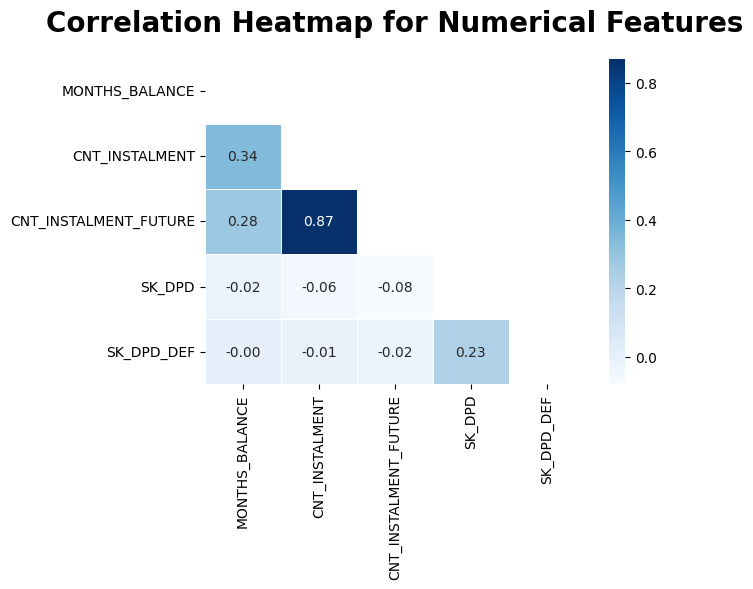

In [36]:
corr_ma = CorrelationMatrix(pos_cash_merged, ['SK_ID_CURR','SK_ID_PREV'], figsize = (7,6))
corr_ma.plot_correlation_matrix()

In [37]:
top_corr_target_df = corr_ma.target_top_corr()
print("Columns with highest values of Phik-correlation with Target Variable are:")
display(top_corr_target_df)


Columns with highest values of Phik-correlation with Target Variable are:


,Feature,Correlation
0,CNT_INSTALMENT_FUTURE,0.021972
1,MONTHS_BALANCE,0.020147
2,CNT_INSTALMENT,0.018506
3,SK_DPD,0.009866
4,SK_DPD_DEF,0.008594
5,SK_ID_CURR,0.002244
6,SK_ID_PREV,0.000056


### Observations 5

<ol>
    <li>The above heatmap shows the correlation betweenreehea fetures</li>
    <li>From the heatmap of correlation matrix, we one set of moderately correlated features, which are: CNT_INSTALMENT and CNT_INSTALMENT_FUTURE.</li>
    <li>The correlation of features with Target is very low, this shows the absence of a linear relationship between the feature and the target variable.</li></ol>

## 6.2. Plotting Continuous Variables

In [38]:

def plot_continuous_variables(data, column_name, plots=['distplot', 'CDF', 'box', 'violin'],
                              scale_limits=None, figsize=(20, 8), hist=False, log_scale=False):
    '''
    Function to plot continuous variables distribution

    Inputs:
        data: DataFrame
            The DataFrame from which to plot.
        column_name: str
            Column's name whose distribution is to be plotted.
        plots: list, default = ['distplot', 'CDF', 'box', 'violin']
            List of plots to plot for Continuous Variable.
        scale_limits: tuple (left, right), default = None
            To control the limits of values to be plotted in case of outliers.
        figsize: tuple, default = (20,8)
            Size of the figure to be plotted.
        hist: bool, default = False
            Whether to plot histogram along with distplot or not.
        log_scale: bool, default = False
            Whether to use log-scale for variables with outlying points.
    '''

    # Filter the data if scale limits are provided
    if scale_limits:
        data = data[(data[column_name] > scale_limits[0]) & (data[column_name] < scale_limits[1])]

    number_of_subplots = len(plots)
    plt.figure(figsize=figsize)

    for i, plot_type in enumerate(plots):
        plt.subplot(1, number_of_subplots, i + 1)
        plt.subplots_adjust(wspace=0.25)

        # Plot CDF
        if plot_type == 'CDF':
            # Ensure TARGET exists in data
            if 'TARGET' in data.columns:
                percentile_values_0 = data[data['TARGET'] == 0].sort_values(by=column_name).dropna()
                percentile_values_0['Percentile'] = np.linspace(0, 1, len(percentile_values_0))

                percentile_values_1 = data[data['TARGET'] == 1].sort_values(by=column_name).dropna()
                percentile_values_1['Percentile'] = np.linspace(0, 1, len(percentile_values_1))

                plt.plot(percentile_values_0[column_name], percentile_values_0['Percentile'], color='red', label='Non-Defaulters')
                plt.plot(percentile_values_1[column_name], percentile_values_1['Percentile'], color='black', label='Defaulters')
                plt.xlabel(column_name)
                plt.ylabel('Probability')
                plt.title(f'CDF of {column_name}', size=25, weight='bold', pad=28)
                plt.legend(fontsize='medium')

                if log_scale:
                    plt.xscale('log')
                    plt.xlabel(column_name + ' - (log-scale)')

        # Plot Distplot (now using histplot and kdeplot)
        if plot_type == 'distplot':
            sns.histplot(data=data, x=column_name, kde=True, hue='TARGET', multiple='stack', color=['red', 'black'],
                         label=['Non-Defaulters', 'Defaulters'], element='step', stat='density', common_norm=False)
            plt.xlabel(column_name)
            plt.ylabel('Probability Density')
            plt.legend(fontsize='medium')
            plt.title(f"Dist-Plot of {column_name}", size=25, weight='bold', pad=28)

            if log_scale:
                plt.xscale('log')
                plt.xlabel(f'{column_name} (Log Scale)')

        # Violin plot
        if plot_type == 'violin':
            sns.violinplot(x='TARGET', y=column_name, data=data, inner='quart')
            plt.title(f"Violin-Plot of {column_name}", size=25, weight='bold', pad=28)

            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (Log Scale)')

        # Box plot
        if plot_type == 'box':
            sns.boxplot(x='TARGET', y=column_name, data=data)
            plt.title(f"Box-Plot of {column_name}", size=25, weight='bold', pad=28)

            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (Log Scale)')

    plt.tight_layout()
    plt.show()


In [39]:
pos_cash_merged_numeric = pos_cash_merged.groupby('SK_ID_PREV').agg('mean', numeric_only = True)
pos_cash_merged_numeric.head()

,SK_ID_CURR,TARGET,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
SK_ID_PREV,,,,,,,
1000001.0,158271.0,0.0,-9.0,8.666667,7.666667,0.0,0.0
1000003.0,252457.0,0.0,-2.5,12.000000,10.500000,0.0,0.0
1000004.0,260094.0,0.0,-25.5,9.625000,6.125000,0.0,0.0
1000005.0,176456.0,0.0,-51.0,10.000000,5.000000,0.0,0.0
1000007.0,256657.0,0.0,-3.0,6.000000,4.000000,0.0,0.0


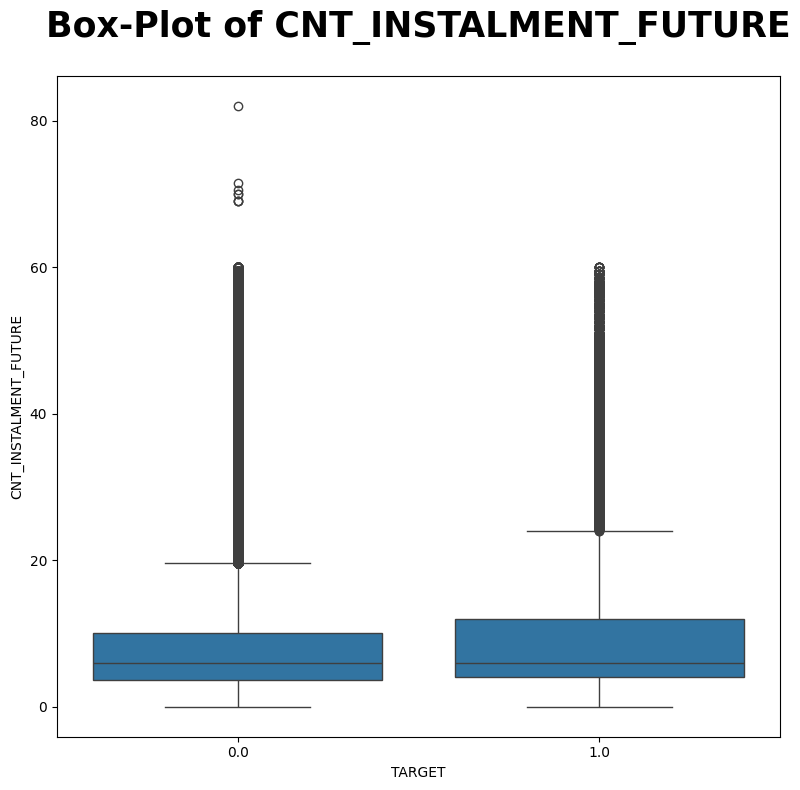

In [40]:
plot_continuous_variables(pos_cash_merged_numeric, 'CNT_INSTALMENT_FUTURE', plots = ['box'], figsize = (8,8))

### Observations 6
At the above box-plot for CNT_INSTALMENT_FUTURE, we see that the percentile values > 50% for Defaulters (TARGET =1) are usually higher than those of Non-Defaulters (TARGET = 0). \
Even the upper limit whisker for Defaulters is higher than that of Non-Defaulters. This suggests that the Defaulters tend to have more number of Installments remaining on their previous credits as compared to Non-Defaulters.

## 6.3. Distribution

In [41]:
def plot_distribution(data, column_name, column_name2=None,
                      plot_type='dist', nrows=1, ncols=2,
                      figsize=(12, 6), dropna=False,
                      sort_values=False, bins='auto', palette='Blues_r'):
    """
    Function to plot the distribution of a variable related to a target variable.
    """
    if plot_type == 'scatter' and column_name2 is None:
        raise ValueError("You must provide `column_name2` for scatter plots.")
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    ax = ax.flatten()

    if dropna:
        data = data.dropna(subset=[column_name, column_name2] if column_name2 else [column_name])
    if sort_values:
        data = data.sort_values(by=column_name)

    targets = data['TARGET'].unique()
    for i, target in enumerate(targets):
        subset = data[data['TARGET'] == target]
        title = f"Target = {target}"
        
        if plot_type == 'dist':
            sns.histplot(subset[column_name], bins=bins, kde=True, ax=ax[i])
        elif plot_type == 'hist':
            sns.histplot(subset[column_name], bins=bins, kde=False, ax=ax[i])
        elif plot_type == 'count':
            sns.countplot(x=subset[column_name], ax=ax[i], palette=palette)
        elif plot_type == 'box':
            sns.boxplot(x=subset[column_name], ax=ax[i], orient='h')
        elif plot_type == 'scatter':
            sns.scatterplot(
                x=subset[column_name],
                y=subset[column_name2],
                ax=ax[i],
                color="blue" if target == 0 else "orange"  # Assign colors manually
            )

        ax[i].set_title(title)
        ax[i].tick_params(axis='x', rotation=45)

    fig.tight_layout()
    plt.show()


In [42]:
pos_cash_merged_numeric.columns

Index(['SK_ID_CURR', 'TARGET', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')

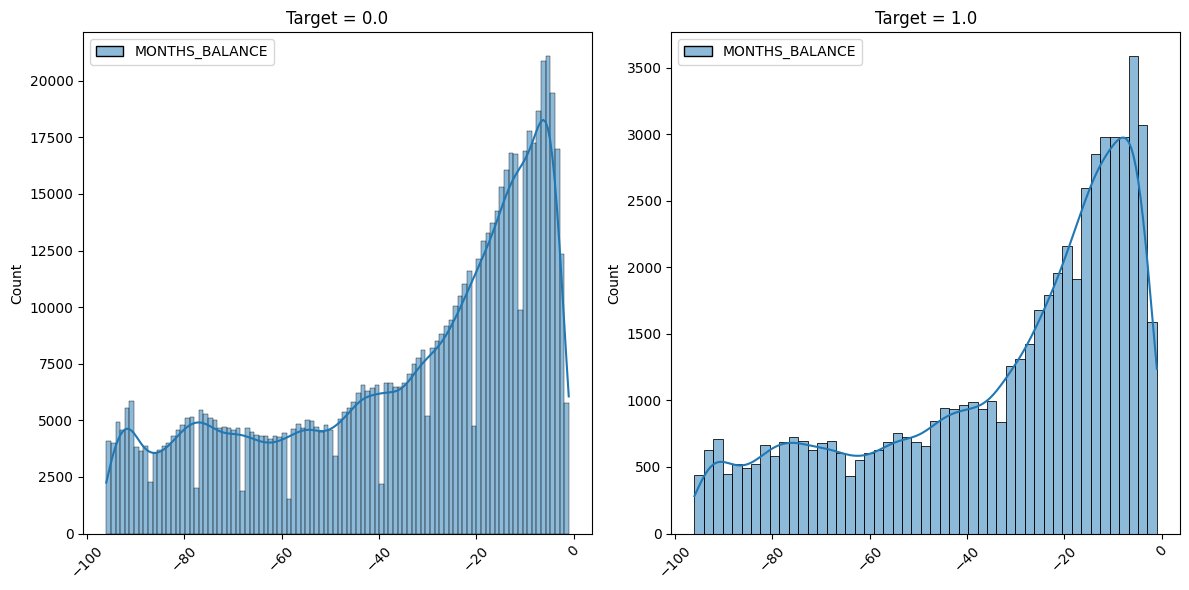

In [43]:
plot_distribution(pos_cash_merged_numeric, ['MONTHS_BALANCE'])

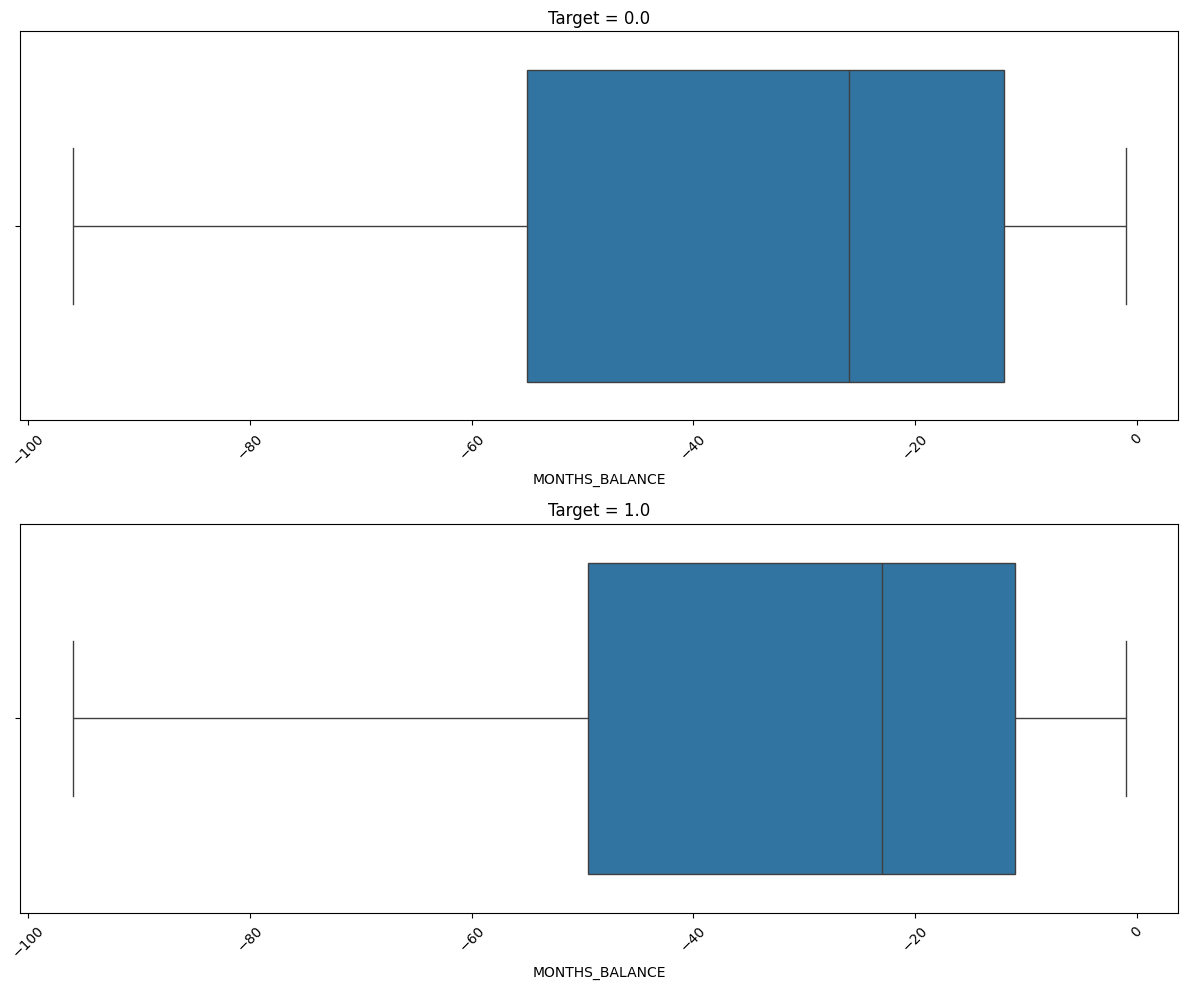

In [44]:
plot_distribution(data = pos_cash_merged_numeric, column_name='MONTHS_BALANCE', plot_type='box', figsize=(12,10), nrows=2, ncols=1, dropna=False)

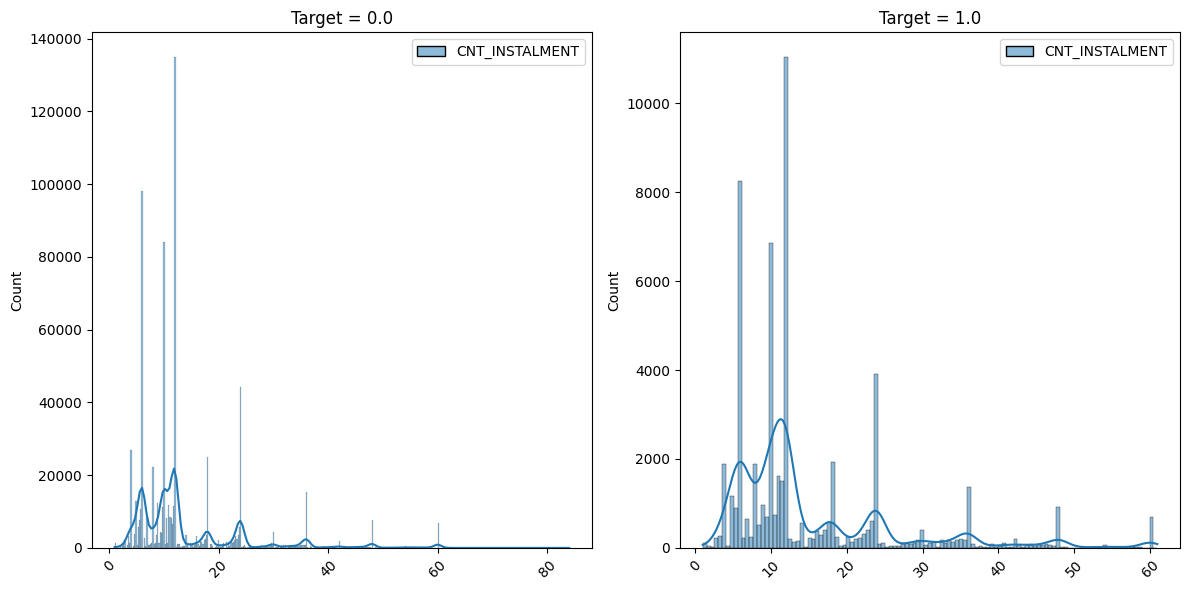

In [45]:
plot_distribution(pos_cash_merged_numeric, ['CNT_INSTALMENT'])

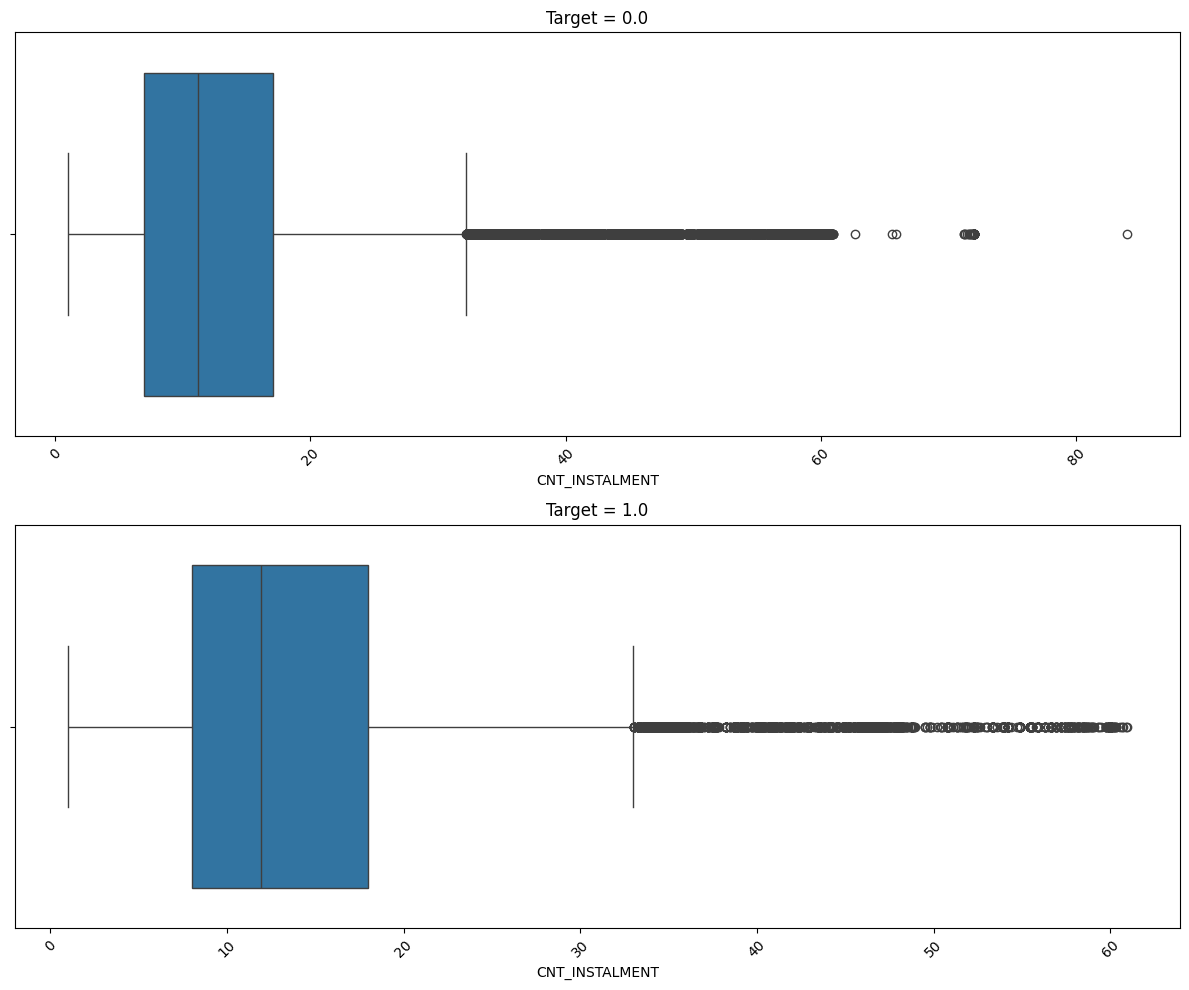

In [46]:
plot_distribution(data = pos_cash_merged_numeric, column_name='CNT_INSTALMENT', plot_type='box', figsize=(12,10), nrows=2, ncols=1, dropna=False)

The box plots illustrate the distribution of `CNT_INSTALMENT` for `Target = 0.0` and `Target = 1.0`. The `Target = 0.0` group shows a wider spread with more extreme outliers, while the `Target = 1.0` group has a tighter distribution with fewer outliers. Both groups have similar medians, suggesting comparable central tendencies, but the higher variability in `Target = 0.0` might reflect different financial behaviors or risks.

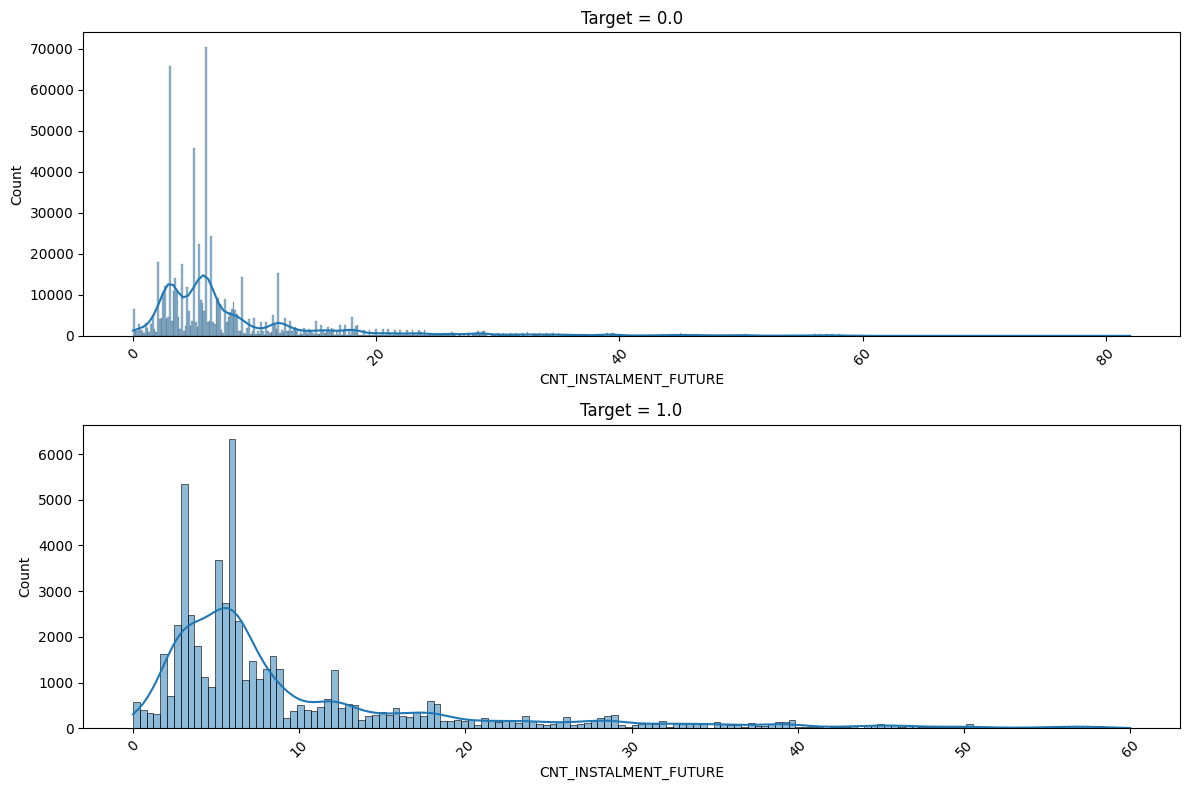

In [47]:
plot_distribution(data = pos_cash_merged_numeric, column_name='CNT_INSTALMENT_FUTURE', plot_type='dist', figsize=(12,8), nrows=2, ncols=1, sort_values=True)

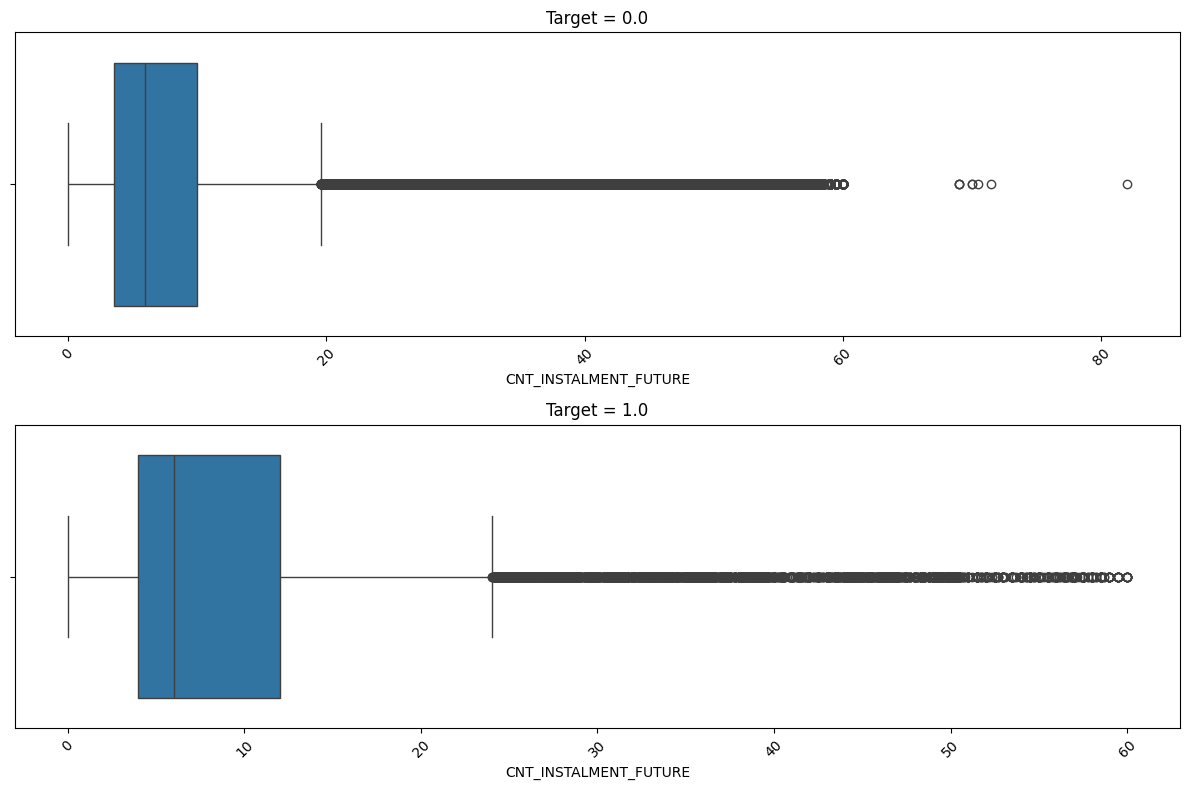

In [48]:
plot_distribution(data = pos_cash_merged_numeric, column_name='CNT_INSTALMENT_FUTURE', plot_type='box', figsize=(12,8), nrows=2, ncols=1, sort_values=True)

### SK_SPD
- DPD (days past due) during the month of previous credit: DPD (số ngày quá hạn) trong tháng của khoản vay trước đó

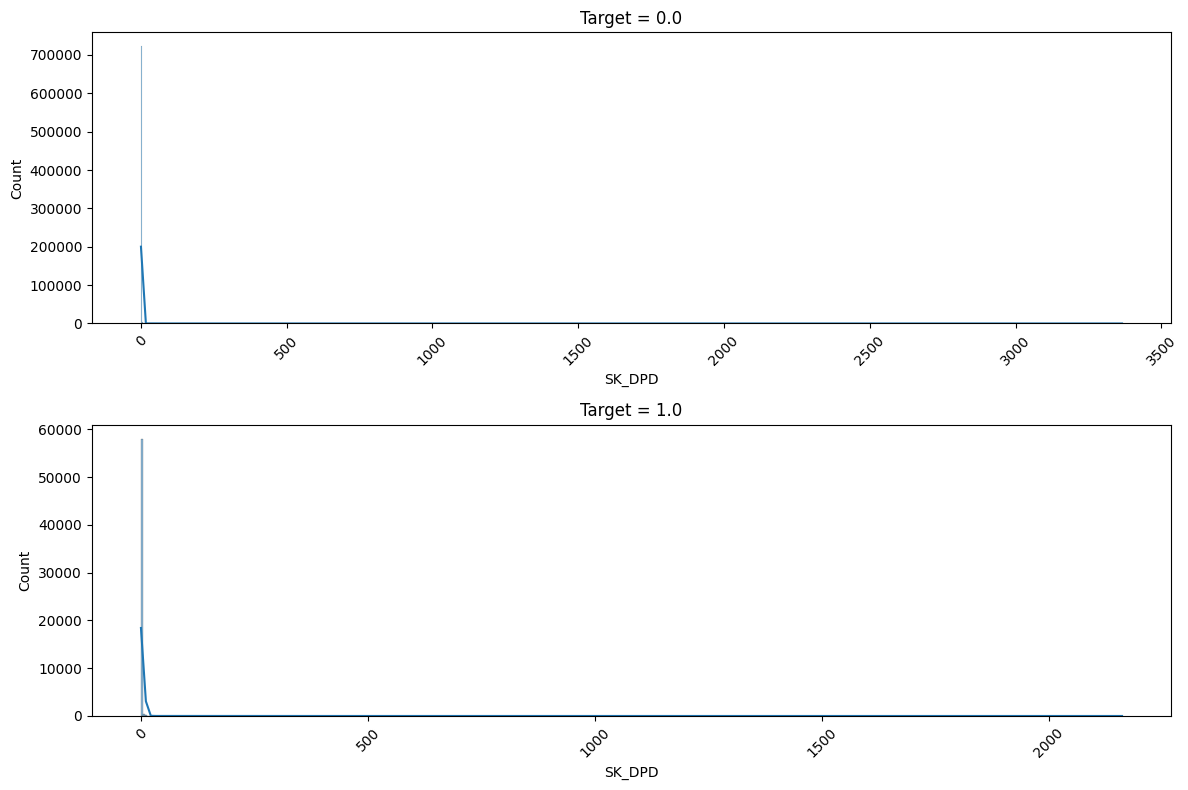

In [49]:
plot_distribution(data = pos_cash_merged_numeric, column_name='SK_DPD', plot_type='dist', figsize=(12,8), nrows=2, ncols=1, sort_values=True)

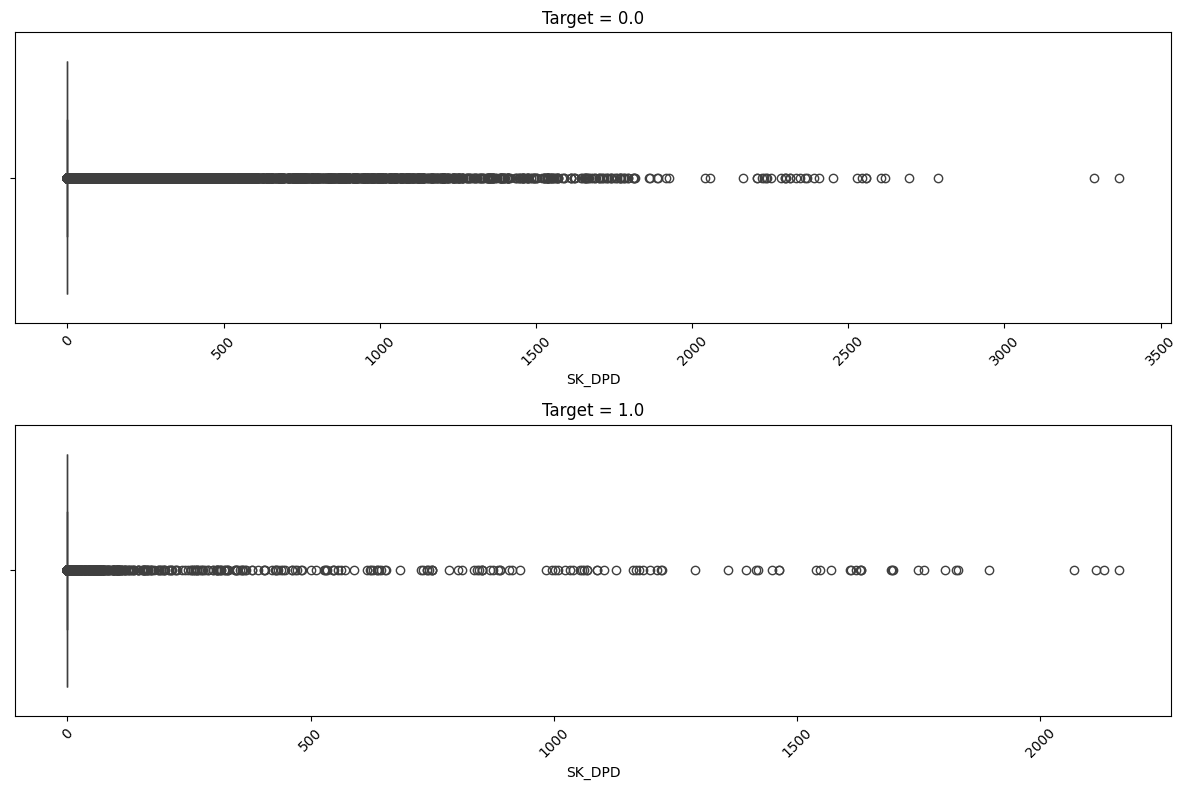

In [50]:
plot_distribution(data = pos_cash_merged_numeric, column_name='SK_DPD', plot_type='box', figsize=(12,8), nrows=2, ncols=1, sort_values=True)

DPD (days past due) during the month of previous credi have a larger ranges of value for these havinng TARGET = 0 than those with TARGET = 1

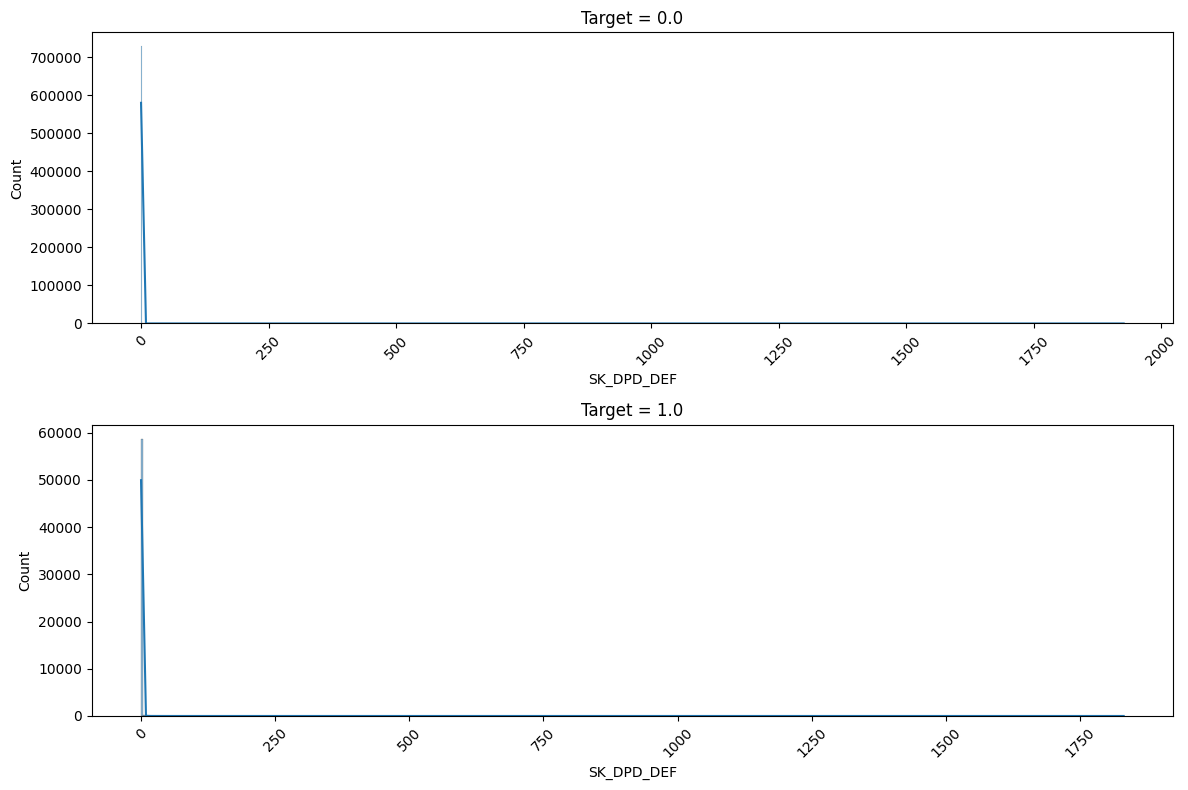

In [51]:
plot_distribution(data = pos_cash_merged_numeric, column_name='SK_DPD_DEF', plot_type='dist', figsize=(12,8), nrows=2, ncols=1, sort_values=True)

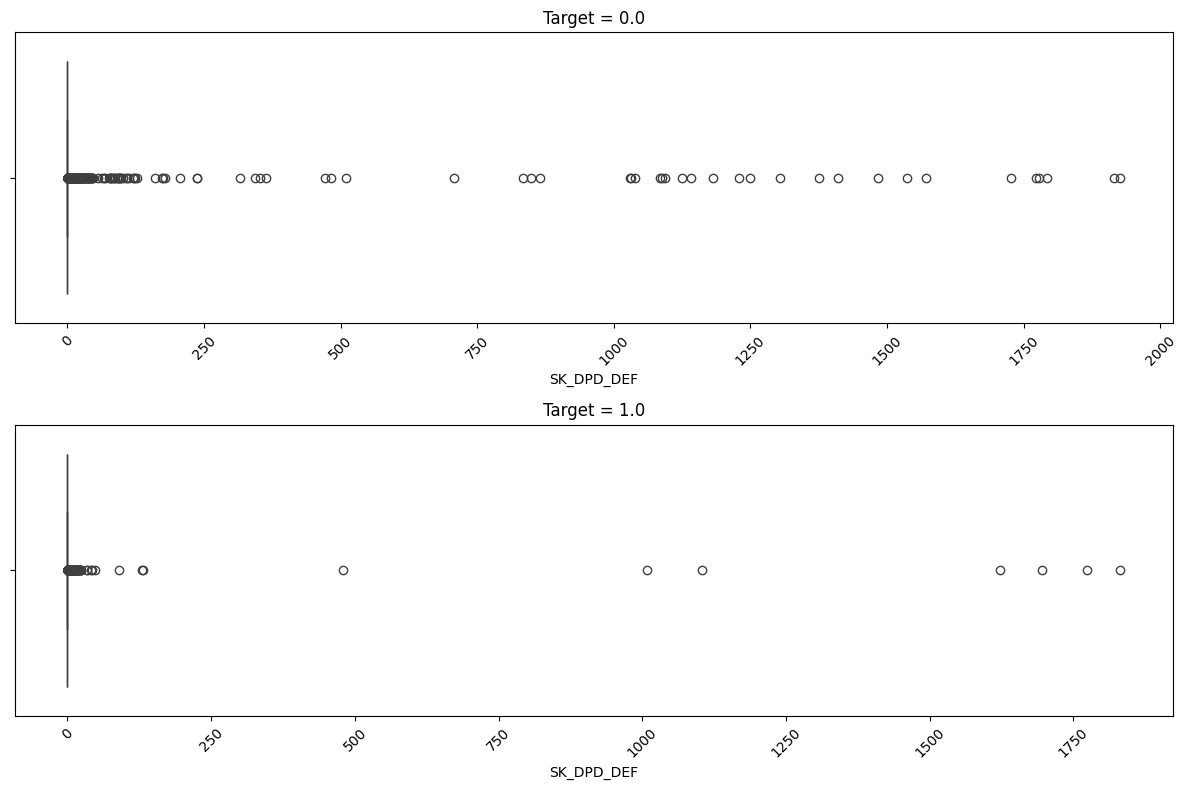

In [52]:
plot_distribution(data = pos_cash_merged_numeric, column_name='SK_DPD_DEF', plot_type='box', figsize=(12,8), nrows=2, ncols=1, sort_values=True)

SK_DPD_DEF: DPD trong tháng với sự chấp nhận (tolerant DPD) của khoản vay trước đó

In [53]:
pos_cash_merged.columns

Index(['SK_ID_CURR', 'TARGET', 'SK_ID_PREV', 'MONTHS_BALANCE',
       'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS',
       'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')

In [54]:
pos_cash_merged["NAME_CONTRACT_STATUS"].value_counts(normalize= True) * 100

NAME_CONTRACT_STATUS
Active                   91.516257
Completed                 7.431162
Signed                    0.873484
Demand                    0.071517
Returned to the store     0.053738
Approved                  0.049407
Amortized debt            0.004272
Canceled                  0.000140
XNA                       0.000023
Name: proportion, dtype: float64

In [55]:
def defaulter_percentage_count_per_cat(df, col):
    """
    Calculates the percentage of defaulters for each category in a column.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        col (str): The column to compute defaulter percentages for.

    Returns:
        pd.DataFrame: DataFrame with categories and their corresponding defaulter percentages.
    """
    if col not in df.columns or "TARGET" not in df.columns:
        print(f"Column '{col}' or 'TARGET' is missing in the dataset.")
        return pd.DataFrame()
    
    if df.empty:
        print("The DataFrame is empty.")
        return pd.DataFrame()
    
    grouped = df.groupby(col)['TARGET'].agg(['sum', 'count']).reset_index()
    grouped.columns = ['Categories', 'Default_Count', 'Total_Count']
    grouped['Percentage_Of_Default'] = (grouped['Default_Count'] / grouped['Total_Count']) * 100
    return grouped
    return grouped[['Categories', 'Percentage_Of_Default']].sort_values(by='Percentage_Of_Default', ascending=False)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23028\2458107744.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df, y= "Categories", x= "Percentage_Of_Default", palette= "Blues_r")


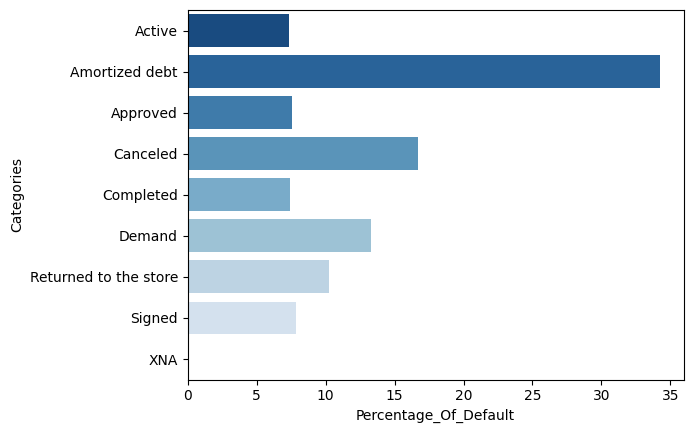

In [56]:
df = defaulter_percentage_count_per_cat(pos_cash_merged, "NAME_CONTRACT_STATUS")
sns.barplot(data= df, y= "Categories", x= "Percentage_Of_Default", palette= "Blues_r")
plt.show()
## Amortized has the highest debt ratio

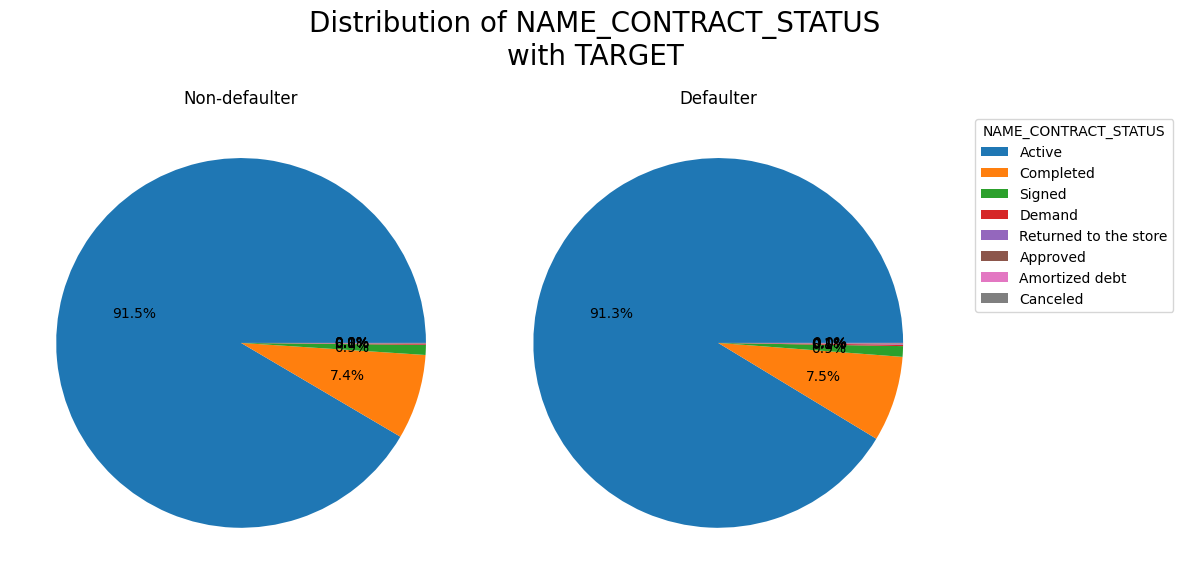

In [57]:
plot_defaulter_comparison(pos_cash_merged, "NAME_CONTRACT_STATUS")

In [58]:
pos_cash_filter = pos_cash.sort_values(by=['MONTHS_BALANCE']).groupby(["SK_ID_CURR", "SK_ID_PREV"]).last().reset_index()
pos_cash_filter.head()

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,100001,1369693,-53,4.0,0.0,Completed,0,0
1,100001,1851984,-93,4.0,0.0,Completed,0,0
2,100002,1038818,-1,24.0,6.0,Active,0,0
3,100003,1810518,-18,7.0,0.0,Completed,0,0
4,100003,2396755,-66,12.0,1.0,Active,0,0


In [59]:
pos_cash_filter["Completed_Flag"] = pos_cash_filter["NAME_CONTRACT_STATUS"].apply(lambda x: 1 if x== "Completed" else 0)
pos_cash_filter["Completed_Count"] = pos_cash_filter.groupby(["SK_ID_CURR"])["Completed_Flag"].transform("sum")
pos_cash_filter.drop(["Completed_Flag"], axis=1, inplace= True)
pos_cash_filter

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,Completed_Count
0,100001,1369693,-53,4.0,0.0,Completed,0,0,2
1,100001,1851984,-93,4.0,0.0,Completed,0,0,2
2,100002,1038818,-1,24.0,6.0,Active,0,0,0
3,100003,1810518,-18,7.0,0.0,Completed,0,0,2
4,100003,2396755,-66,12.0,1.0,Active,0,0,2
...,...,...,...,...,...,...,...,...,...
936320,456255,1359084,-7,8.0,0.0,Completed,0,0,6
936321,456255,1743609,-23,10.0,0.0,Completed,0,0,6
936322,456255,2073384,-17,3.0,0.0,Completed,0,0,6
936323,456255,2631384,-2,24.0,0.0,Completed,0,0,6


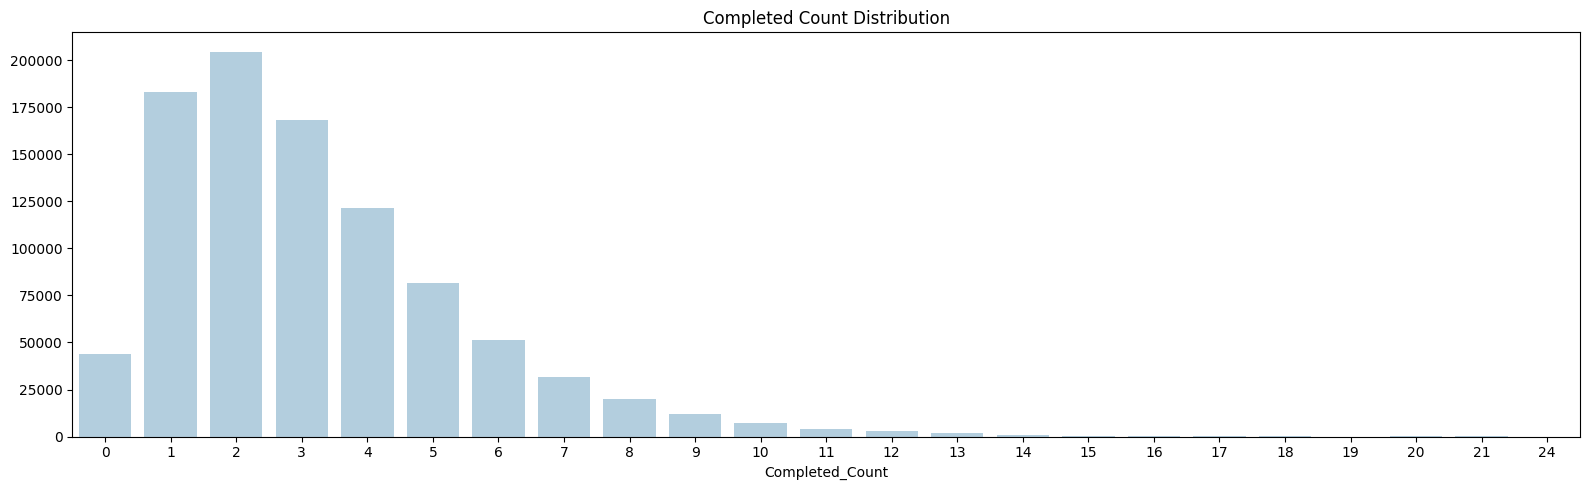

In [60]:
completed_count_SK = pos_cash_filter.groupby(["Completed_Count"]).size()
plt.figure(figsize=(16,5))
sns.set_palette("Blues_d", len(pos_cash_filter))
sns.barplot(x=  completed_count_SK.index , y= completed_count_SK.values)
plt.title("Completed Count Distribution")
plt.tight_layout()
plt.show()

The number of completed loans which have the highest count is 2. The previous contract status can affect the number of completed contracts

In [61]:
def overdue_flag(x):
    if x['SK_DPD_DEF'] > 0 and x['CNT_INSTALMENT_FUTURE'] > 0:
        return 1
    else:
        return 0

pos_cash_filter["Overdue_flag"] = pos_cash_filter.apply(overdue_flag, axis= 1)
pos_cash_filter

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,Completed_Count,Overdue_flag
0,100001,1369693,-53,4.0,0.0,Completed,0,0,2,0
1,100001,1851984,-93,4.0,0.0,Completed,0,0,2,0
2,100002,1038818,-1,24.0,6.0,Active,0,0,0,0
3,100003,1810518,-18,7.0,0.0,Completed,0,0,2,0
4,100003,2396755,-66,12.0,1.0,Active,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
936320,456255,1359084,-7,8.0,0.0,Completed,0,0,6,0
936321,456255,1743609,-23,10.0,0.0,Completed,0,0,6,0
936322,456255,2073384,-17,3.0,0.0,Completed,0,0,6,0
936323,456255,2631384,-2,24.0,0.0,Completed,0,0,6,0


In [62]:
pos_cash_filter["Overdue_Count"] = pos_cash_filter.groupby(["SK_ID_CURR"])["Overdue_flag"].transform("sum")
pos_cash_filter.drop(["Overdue_flag"], axis= 1, inplace= True)
pos_cash_filter.head()

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,Completed_Count,Overdue_Count
0,100001,1369693,-53,4.0,0.0,Completed,0,0,2,0
1,100001,1851984,-93,4.0,0.0,Completed,0,0,2,0
2,100002,1038818,-1,24.0,6.0,Active,0,0,0,0
3,100003,1810518,-18,7.0,0.0,Completed,0,0,2,0
4,100003,2396755,-66,12.0,1.0,Active,0,0,2,0


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23028\4173940804.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= overdue_count_SK.index , y= overdue_count_SK.values, palette="Blues_r")


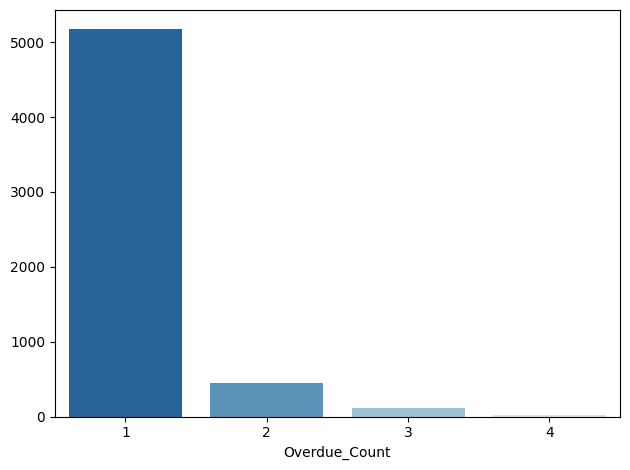

In [63]:
overdue_count_SK = pos_cash_filter.groupby(["Overdue_Count"]).size()[1:]
sns.barplot(x= overdue_count_SK.index , y= overdue_count_SK.values, palette="Blues_r")

plt.tight_layout()
plt.show()

In [64]:
pf_final = pos_cash_filter.groupby('SK_ID_CURR').first()[["Completed_Count","Overdue_Count"]]
pf_final

,Completed_Count,Overdue_Count
SK_ID_CURR,,
100001,2,0
100002,0,0
100003,2,0
100004,1,0
100005,1,0
...,...,...
456251,1,0
456252,1,0
456253,2,0


<Axes: xlabel='Completed_Count', ylabel='Overdue_Count'>

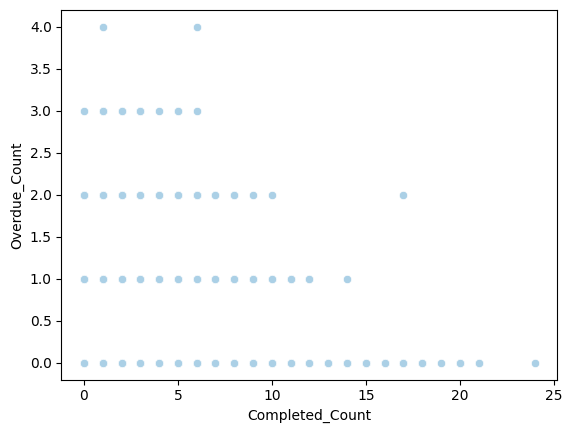

In [65]:
sns.scatterplot(data = pf_final, x= 'Completed_Count', y='Overdue_Count')


The more number of completed contracts, the less overdue contracts that a person could have

### Observations 7
**1. Imbalance Ratios:**
- 'CNT_INSTALMENT_FUTURE' has a moderate imbalance ratio of 0.432.
- Other columns, such as 'NAME_CONTRACT_STATUS,' 'SK_DPD,' and 'SK_DPD_DEF,' have low imbalance ratios ranging from 0.0000 to 0.0023.

**2. Outliers:**
- No specific outlier information is provided for columns such as 'MONTHS_BALANCE,' 'CNT_INSTALMENT,' and 'CNT_INSTALMENT_FUTURE.'
- Columns 'SK_DPD' and 'SK_DPD_DEF' have many outliers.\
**3. Category Columns:**
- The 'NAME_CONTRACT_STATUS' feature has nine unique values, suggesting it is a categorical variable.
- There are no missing values (NaN) in the 'NAME_CONTRACT_STATUS' column.
